In [32]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PART 1

HOW TO CLEAN DATA WITH PYTHON Cleaning US Census Data You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

## 1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [33]:
# reading csv from dataset
state0 = pd.read_csv('dataset/states0.csv', encoding='utf-8', index_col=0)
state0

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


<AxesSubplot:xlabel='FemalePop', ylabel='Income'>

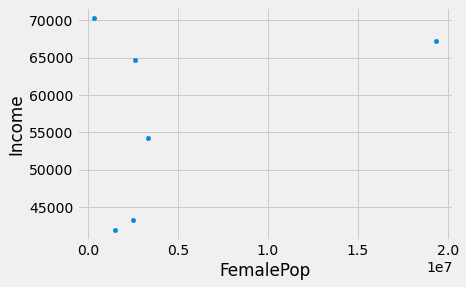

In [34]:
# splitting male and female population from GenderPop column
state0[['MalePop', 'FemalePop']] = state0['GenderPop'].str.split('_',expand=True)

# replacing 'str' characters from Income, MalePop and FemalePop column
state0 = state0.replace({'Income': {'\$': ''},
                         'MalePop': {'M': ''},
                         'FemalePop': {'F': ''}}, regex=True)

# changing data type
state0[['Income', 'MalePop', 'FemalePop']] = state0[['Income', 'MalePop', 'FemalePop']].apply(pd.to_numeric)
state0

# scatter plot of average income vs female population in the state
state0.plot.scatter('FemalePop', 'Income')

### Another example

In [35]:
# reading csv from dataset
state1 = pd.read_csv('dataset/states1.csv', encoding='utf-8', index_col=0)
state1

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F
5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F


<AxesSubplot:xlabel='FemalePop', ylabel='Income'>

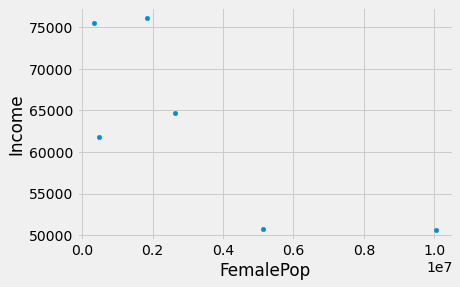

In [36]:
# splitting male and female population from GenderPop column
state1[['MalePop', 'FemalePop']] = state1['GenderPop'].str.split('_',expand=True)

# replacing 'str' characters from Income, MalePop and FemalePop column
state1 = state1.replace({'Income': {'\$': ''},
                         'MalePop': {'M': ''},
                         'FemalePop': {'F': ''}}, regex=True)

# changing data type
state1[['Income', 'MalePop', 'FemalePop']] = state1[['Income', 'MalePop', 'FemalePop']].apply(pd.to_numeric)
state1

# scatter plot average income vs female population in the state
state1.plot.scatter('FemalePop', 'Income')

## 2. It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [37]:
# importing all states files and concatenate them to form a DataFrame using glob module,
# https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
all_files = glob.glob("dataset/states?.csv")
us_census = pd.concat((pd.read_csv(f, encoding='utf-8', index_col=0) for f in all_files),
                      ignore_index=True)

## 3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [38]:
# column names
display(us_census.columns)

# columns datatype
display(us_census.dtypes)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

## 4. Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [39]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


##  5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [40]:
# replacing '$' from Income and converting its data type to numerical type
us_census['Income'] = us_census['Income'].replace({'\$':''}, regex = True).apply(pd.to_numeric)
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object

## 6. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [41]:
# splitting GenderPop column into MalePop and FemalePop columns
us_census[['MalePop', 'FemalePop']] = us_census['GenderPop'].str.split('_',expand=True)

## 7. Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [42]:
# replacing 'M' and 'F' character with empty string
us_census = us_census.replace({'MalePop': {'M': ''},
                               'FemalePop': {'F': ''}}, regex=True)

# converting the dtype into numeric
us_census[['MalePop', 'FemalePop']] = us_census[['MalePop', 'FemalePop']].apply(pd.to_numeric)
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
MalePop        int64
FemalePop    float64
dtype: object

In [43]:
# convert 'Men' and 'Women' columns datatype into numeric format
us_census['Men'] = pd.to_numeric(us_census['Men'], errors='coerce')
us_census['Women'] = pd.to_numeric(us_census['Women'], errors='coerce')
us_census.dtypes

KeyError: 'Men'

## 8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!

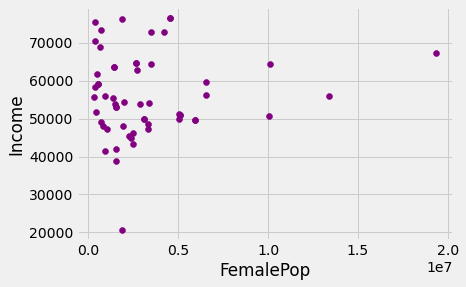

In [44]:
# scatter plot with NaN values in 'FemalePop' column
the_women_column  = us_census['FemalePop']
the_income_column = us_census['Income']

plt.xlabel('FemalePop')
plt.ylabel('Income')
plt.scatter(x=the_women_column, y=the_income_column, c='purple')
plt.show()

## 9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [45]:
# counting the number of NaN values in FemalePop
us_census['FemalePop'].isnull().sum()

3

In [46]:
# taking the estimated women population per state
est_women = us_census.TotalPop - us_census.MalePop
us_census['FemalePop'].fillna(est_women, inplace=True)

# checking if there is still any NaN value in the column
us_census['FemalePop'].isnull().sum()

0

In [47]:
# displaying FemalePop column after filling NaN values
us_census.FemalePop

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

## 10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [48]:
# number of duplicates in us_census
us_census.duplicated().sum()

9

In [49]:
# duplicate rows in us_census
us_census[us_census.duplicated()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
12,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,50811.082051,4883331M_5123362F,4883331,5123362.0
18,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,53017.753041,1534595M_1558931F,1534595,1558931.0
24,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,78765.400725,2872643M_F,2872643,3057895.0
30,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.987726,2964003M_3081445F,2964003,3081445.0
36,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,76581.083417,4343027M_4561386F,4343027,4561386.0
42,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.248466,5662893M_5913084F,5662893,5913084.0
48,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833,510388M_543273F,510388,543273.0
54,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.917808,1459229M_1444150F,1459229,1444150.0


## 11. Drop those duplicates using the .drop_duplicates() function.

In [50]:
# dropping duplicates rows in us_census
us_census.drop_duplicates(inplace=True)

In [51]:
# checking duplicates again
us_census.duplicated().sum()

0

## 12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

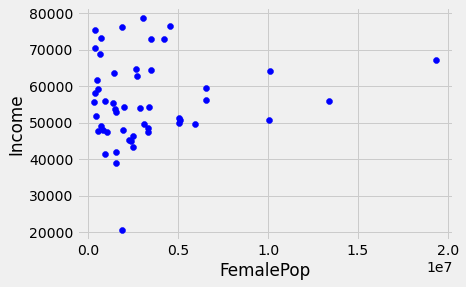

In [52]:
the_women_column  = us_census['FemalePop']
the_income_column = us_census['Income']

plt.xlabel('FemalePop')
plt.ylabel('Income')
plt.scatter(x=the_women_column, y=the_income_column, c='blue')
plt.show()

## 13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [53]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'MalePop', 'FemalePop'],
      dtype='object')

## 14. Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [54]:
# removing '%' from the race columns
us_census = us_census.replace({'Hispanic': {'%': ''},
                               'White': {'%': ''},
                               'Black': {'%': ''},
                               'Native': {'%': ''},
                               'Asian': {'%': ''},
                               'Pacific': {'%': ''}}, regex=True)

In [55]:
# converting race columns data type into numeric format
race_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
us_census[race_cols] = us_census[race_cols].apply(pd.to_numeric)
us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
MalePop        int64
FemalePop    float64
dtype: object

In [56]:
# finding number of NaN values in race_cols
us_census[race_cols].isnull().sum()

Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
dtype: int64

In [57]:
# taking the estimated Pacific population per state
est_pacific = 100 + (us_census['Hispanic'] - us_census['Black'] - us_census['White']\
                     - us_census['Asian'] - us_census['Native'])

# filling missing value with estimated pacific population
us_census['Pacific'].fillna(est_pacific, inplace=True)

In [58]:
# finding duplicates if there is any
us_census.duplicated().sum()

0

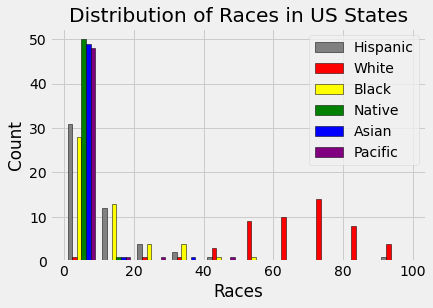

In [59]:
# histogram graph for the all races per state
plt.style.use('fivethirtyeight')

hispanicPop = us_census['Hispanic']
whitePop = us_census['White']
blackPop = us_census['Black']
nativePop = us_census['Native']
asianPop = us_census['Asian']
pacificPop = us_census['Pacific']

mybins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist([hispanicPop, whitePop, blackPop, nativePop, asianPop, pacificPop],
         color=['grey', 'red', 'yellow', 'green', 'blue', 'purple'],
         label=['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
         bins=mybins, edgecolor='black')

plt.title('Distribution of Races in US States')
plt.legend(loc='best')
plt.xlabel('Races')
plt.ylabel('Count')
plt.show()

## 15. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

### Another useful data could be to find the total state wise population and find out which state has max and which state has min population. This data could be useful for population control in the future.

In [60]:
# finding state that has max population
us_census[us_census.TotalPop == us_census.TotalPop.max()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.35141,67264.782303,19087135M_19334329F,19087135,19334329.0


In [61]:
# finding state that has min population
us_census[us_census.TotalPop == us_census.TotalPop.min()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
55,Vermont,626604,1.60929,93.98306,0.980874,0.301639,1.238798,0.030601,55602.967213,308573M_318031F,308573,318031.0


### Plotting all states with their respective population

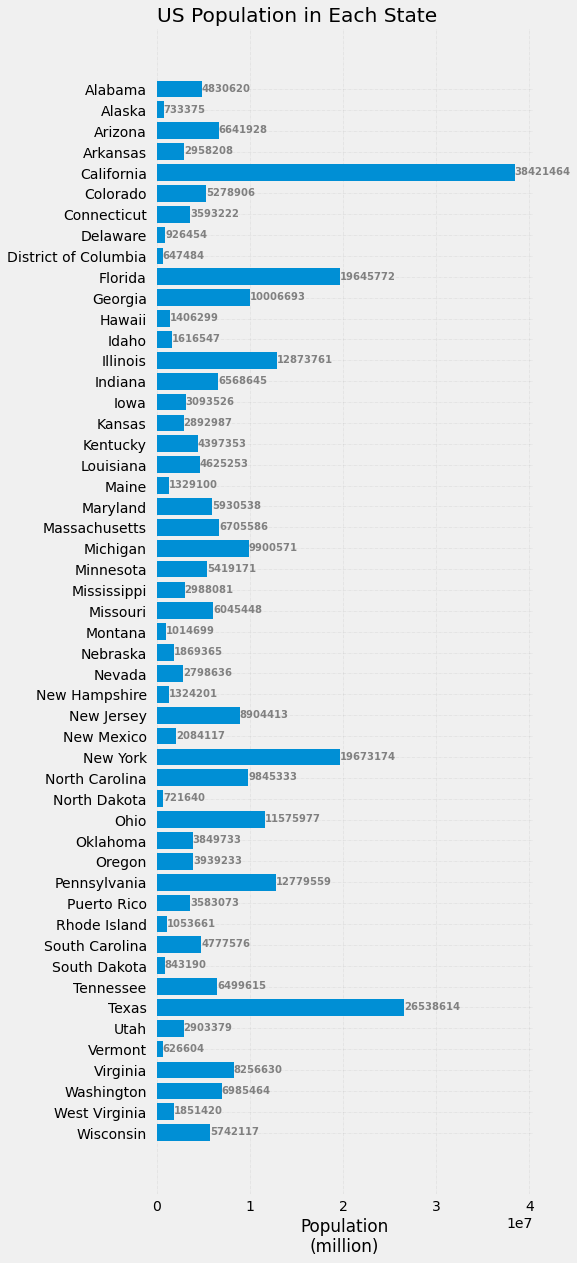

In [62]:
# assigning 'State' and 'TotalPop' columns to the variables
name = us_census['State']
pop = us_census['TotalPop'] 
  
# figure Size 
fig, ax = plt.subplots(figsize =(6, 20)) 
  
# horizontal Bar Plot 
ax.barh(name, pop) 
  
# remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

# remove x, y Ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# show top values  
ax.invert_yaxis() 
  
# add explanation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 

# add title
ax.set_title('US Population in Each State', 
             loc ='left')

# add x-xis label
ax.set_xlabel('Population\n(million)')

# show Plot 
plt.show() 

# PART 2:

LEARN DATA ANALYSIS WITH PANDAS Petal Power Inventory You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

## Answer Customer Emails 1. Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [63]:
inventory = pd.read_csv('dataset/inventory.csv')

## 2. Inspect the first 10 rows of inventory.

In [64]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


## 3. The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [65]:
staten_island = inventory.loc[0:9,:]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


## 4. A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [66]:
product_request = staten_island.loc[0:9,'product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

## 5. Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [67]:
inventory.head()

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99


In [68]:
seed_request = inventory.loc[(inventory['location']=='Brooklyn') &
                             (inventory['product_type']=='seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


## 6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [69]:
inventory['in_stock'] = np.where(inventory['quantity']==0, False, True)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


## 7. Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.

In [70]:
inventory['total_value'] = inventory['price'] * inventory['quantity']
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


## 8. The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row:
'{} - {}'.format(row.product_type, row.product_description)

In [71]:
combine_lambda = lambda row:'{}-{}'.format(row.product_type, row.product_description)
combine_lambda

<function __main__.<lambda>(row)>

## 9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [72]:
inventory['full_description'] = inventory[['product_type', 'product_description']].apply(combine_lambda, axis=1)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds-daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds-calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds-tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools-rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools-wheelbarrow
